In [1]:
import pandas as pd


# Read the CSV file
data_train1 = pd.read_csv('0D.csv', nrows=700000)
data_train2  = pd.read_csv('1D.csv',nrows=700000)
data_train3  = pd.read_csv('2D.csv',nrows=700000)
data_train4  = pd.read_csv('3D.csv',nrows=700000)
data_train5  = pd.read_csv('4D.csv',nrows=700000)

# Print the column names



In [37]:
data_train1.dropna(inplace=True)
data_train1.fillna(value=0, inplace=True)
data_train1.fillna(data_train1.mean(), inplace=True)


data_train2.dropna(inplace=True)
data_train2.fillna(value=0, inplace=True)
data_train2.fillna(data_train2.mean(), inplace=True)


data_train3.dropna(inplace=True)
data_train3.fillna(value=0, inplace=True)
data_train3.fillna(data_train3.mean(), inplace=True)


data_train4.dropna(inplace=True)
data_train4.fillna(value=0, inplace=True)
data_train4.fillna(data_train4.mean(), inplace=True)


data_train5.dropna(inplace=True)
data_train5.fillna(value=0, inplace=True)
data_train5.fillna(data_train5.mean(), inplace=True)

In [21]:
data_eval0    = pd.read_csv('0E.csv',nrows=700000)
data_eval1    = pd.read_csv('1E.csv',nrows=700000)
data_eval2    = pd.read_csv('2E.csv',nrows=700000)
data_eval3    = pd.read_csv('3E.csv',nrows=700000)
data_eval4    = pd.read_csv('4E.csv',nrows=700000)


In [42]:

print("0D dataset shape: ",data_train1.shape)
print("1D dataset shape: ",data_train2.shape)
print("2D dataset shape: ",data_train3.shape)
print("3D dataset shape: ",data_train4.shape)
print("4D dataset shape: ",data_train5.shape)
print("0E dataset shape: ",data_eval0.shape)
print("1E dataset shape: ",data_eval1.shape)
print("2E dataset shape: ",data_eval2.shape)
print("3E dataset shape: ",data_eval3.shape)
print("4E dataset shape: ",data_eval4.shape)

0D dataset shape:  (700000, 6)
1D dataset shape:  (700000, 6)
2D dataset shape:  (700000, 6)
3D dataset shape:  (700000, 6)
4D dataset shape:  (700000, 6)
0E dataset shape:  (700000, 5)
1E dataset shape:  (700000, 6)
2E dataset shape:  (700000, 6)
3E dataset shape:  (700000, 5)
4E dataset shape:  (700000, 5)


In [4]:
data_train1['Strength'] = 0
data_train2['Strength'] = 1
data_train3['Strength'] = 2
data_train4['Strength'] = 3
data_train5['Strength'] = 4

In [5]:

sample_df1 = data_train1.head(700000)
sample_df2 = data_train2.head(700000)
sample_df3 = data_train3.head(700000)
sample_df4 = data_train4.head(700000)
sample_df5 = data_train5.head(700000)

# Concatenate the sampled dataframes
concatenated_data = pd.concat([sample_df1, sample_df2, sample_df3, sample_df4, sample_df5], axis=0, ignore_index=True)

# Print the concatenated data
print(concatenated_data.shape)


(3500000, 6)


In [6]:
from sklearn.model_selection import train_test_split

# Split the dataset into X and y
X = concatenated_data[['V_in', 'Measured_RPM', 'Vibration_1', 'Vibration_2', 'Vibration_3']]
y = concatenated_data[['Strength']]
# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print(y_test.shape)

(700000, 1)


In [8]:
#Loading the trained model
from sklearn.metrics import accuracy_score
import joblib

# Load the Random Forest model from the file
rf_model = joblib.load('random_forest_model.pkl')


In [41]:
# Make predictions on the testing data
y_pred = rf_model.predict(X_test)
print(y_pred.shape)

(700000,)


In [39]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, f1_score
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print('MAE: {:.2f}'.format(mae))
print('RMSE: {:.2f}'.format(rmse))
print('Accuracy: {:.2f}%'.format(accuracy * 100))
print('F1 Score: {:.2f}'.format(f1score))

MAE: 0.14
RMSE: 0.54
Accuracy: 92.08%
F1 Score: 0.92


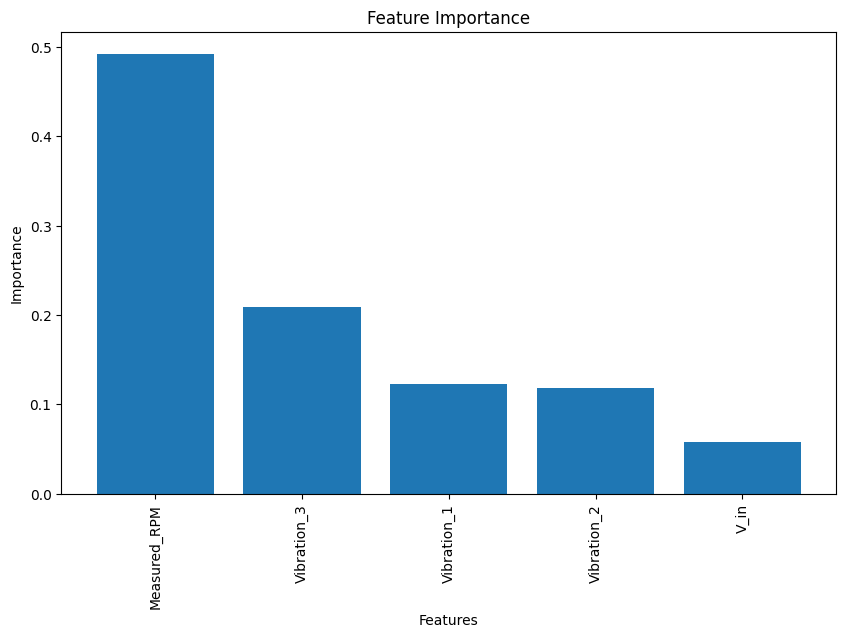

In [35]:
# Get feature importances
import matplotlib.pyplot as plt
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

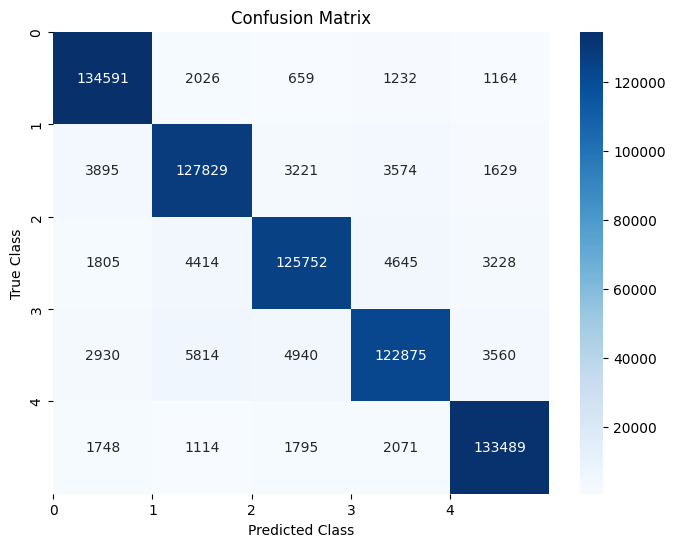

In [10]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the confusion matrix
# Define the class labels
classes = [0, 1, 2, 3, 4]
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks(ticks=range(len(classes)), labels=classes)
plt.yticks(ticks=range(len(classes)), labels=classes)
plt.show()

(700000, 5)


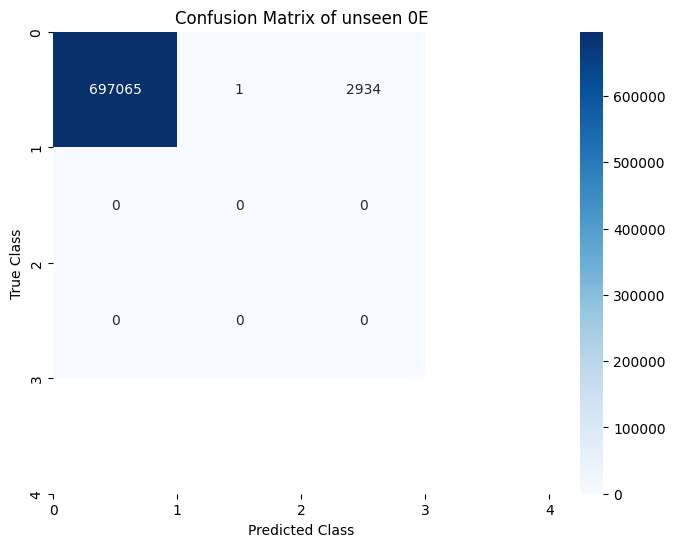

In [11]:
# Make predictions on the testing data
print(data_eval0.shape)
y_pred0 = rf_model.predict(data_eval0)
data_eval0['Strength'] = 0
y_test_0 = data_eval0['Strength']
cm0 = confusion_matrix(y_test_0, y_pred0)
plt.figure(figsize=(8, 6))
sns.heatmap(cm0, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of unseen 0E')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks(ticks=range(len(classes)), labels=classes)
plt.yticks(ticks=range(len(classes)), labels=classes)
plt.show()

In [26]:
# Make predictions on the testing data
y_pred1 = rf_model.predict(data_eval1)

In [28]:
data_eval1['Strength'] = 1
y_test_1 = data_eval1['Strength']

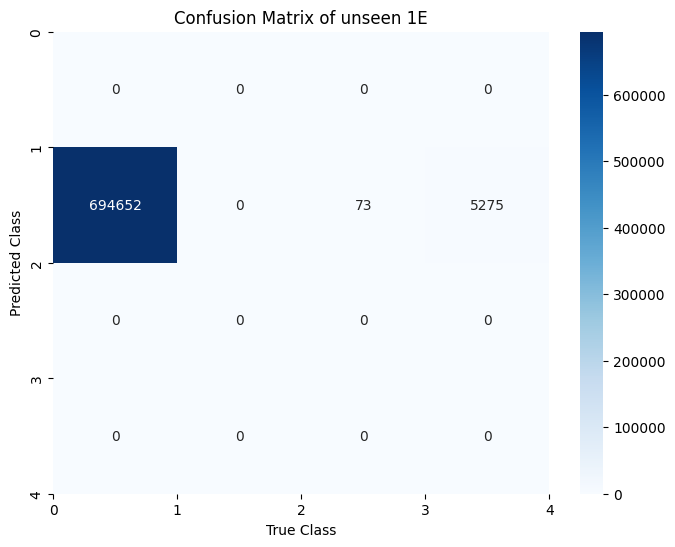

In [40]:
cm1 = confusion_matrix(y_test_1, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of unseen 1E')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.xticks(ticks=range(len(classes)), labels=classes)
plt.yticks(ticks=range(len(classes)), labels=classes)
plt.show()